In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
df = pd.read_csv(
    "../dags/data/final/historical_weather.csv", 
    parse_dates=["date_extraction", "date_observation"]
)

print(f"Lines : {len(df)}")
print(f"Columns : {len(df.columns)}")

Lines : 10065
Columns : 21


In [2]:
# Data overview
df.head()

,ville,date_extraction,date_observation,temperature_moy,temp_min,temp_max,humidite_moy,precipitation,vent_moyen,visibilite_moy,...,annee,mois,jour,saison,temp_ideale,peu_vent,peu_pluie,bonne_visibilite,score_meteo,periode_recommandee
0,Lyon,2025-07-04 15:22:58,2020-01-01 12:00:00,-0.1,-0.7,0.5,99,0.000,6.9,0.2,...,2020,1,1,Hiver,False,True,True,False,50,False
1,Toulouse,2025-07-04 15:22:58,2020-01-01 12:00:00,8.2,4.9,11.2,80,0.000,7.9,19.5,...,2020,1,1,Hiver,False,True,True,True,70,False
2,Nice,2025-07-04 15:22:58,2020-01-01 12:00:00,8.8,5.8,14.0,65,0.000,23.6,25.6,...,2020,1,1,Hiver,False,False,True,True,50,False
3,Paris,2025-07-04 15:22:58,2020-01-01 12:00:00,2.2,-0.7,4.5,98,0.028,10.8,1.8,...,2020,1,1,Hiver,False,True,True,False,50,False
4,Marseille,2025-07-04 15:22:58,2020-01-01 12:00:00,4.8,0.7,10.7,88,0.039,8.7,9.0,...,2020,1,1,Hiver,False,True,True,True,70,False


In [47]:
# Data type and missing values overview
print("Data types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

Data types:
ville                          object
date_extraction        datetime64[ns]
date_observation       datetime64[ns]
temperature_moy               float64
temp_min                      float64
temp_max                      float64
humidite_moy                    int64
precipitation                 float64
vent_moyen                    float64
visibilite_moy                float64
conditions                     object
annee                           int32
mois                            int64
jour                            int64
saison                         object
temp_ideale                      bool
peu_vent                         bool
peu_pluie                        bool
bonne_visibilite                 bool
score_meteo                     int64
periode_recommandee              bool
mois_str                       object
dtype: object

Missing values:
ville                  0
date_extraction        0
date_observation       0
temperature_moy        0
temp_min             

In [ ]:
# Descriptive statistics for numerical and categorical features
print("Numerical descriptive statistics:")
display(df.describe(include='number'))

print("\nCategorical descriptive statistics:")
display(df.describe(include='object'))

Numerical descriptive statistics:


,temperature_moy,temp_min,temp_max,humidite_moy,precipitation,vent_moyen,visibilite_moy,annee,mois,jour,score_meteo
count,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000
mean,14.963845,10.917170,19.283021,70.291505,1.512327,22.768684,23.646647,2022.277198,6.251366,15.691505,64.149031
std,6.924045,6.509195,7.659530,12.722170,4.996656,9.903660,8.724525,1.603808,3.435964,8.809034,19.613557
min,-3.300000,-6.100000,-1.900000,25.000000,0.000000,1.900000,0.200000,2020.000000,1.000000,1.000000,20.000000
25%,9.800000,6.100000,13.800000,61.000000,0.000000,15.900000,18.300000,2021.000000,3.000000,8.000000,50.000000
50%,14.400000,10.700000,18.800000,71.000000,0.007000,21.100000,22.800000,2022.000000,6.000000,16.000000,70.000000
75%,20.400000,15.900000,25.200000,80.000000,0.441000,27.700000,28.000000,2024.000000,9.000000,23.000000,80.000000
max,33.200000,28.100000,42.000000,100.000000,102.487000,75.100000,56.200000,2025.000000,12.000000,31.000000,100.000000



Categorical descriptive statistics:


,ville,conditions,saison,mois_str
count,10065,10065,10065,10065
unique,5,9,4,12
top,Lyon,Rain,Printemps,January
freq,2013,5249,2760,930


In [52]:
# Value ranges for key weather variables
print("Value ranges")
print(f"Average temperature : {df['temperature_moy'].min()}°C à {df['temperature_moy'].max()}°C")
print(f"Max precipitation : {df['precipitation'].max()} mm")
print(f"Weather score : {df['score_meteo'].min()} à {df['score_meteo'].max()}")

Value ranges
Average temperature : -3.3°C à 33.2°C
Max precipitation : 102.487 mm
Weather score : 20 à 100


In [53]:
# Time range of the dataset
print("\nTime range")
print(f"From : {df['date_observation'].min()}")
print(f"To : {df['date_observation'].max()}")


Time range
From : 2020-01-01 12:00:00
To : 2025-07-05 12:00:00


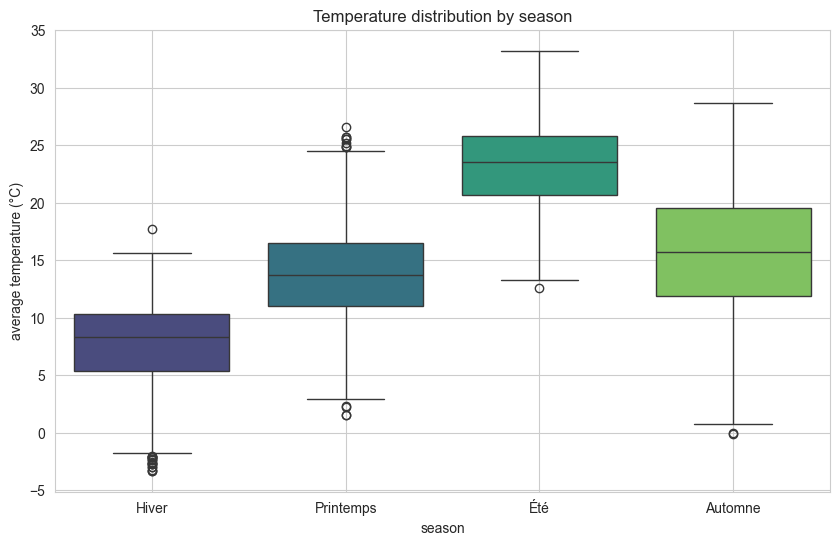

In [54]:
# Temperature distribution by season
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='saison', y='temperature_moy', hue='saison',
            palette='viridis', order=['Hiver', 'Printemps', 'Été', 'Automne'], legend=False)
plt.title('Temperature distribution by season')
plt.xlabel('season')
plt.ylabel('average temperature (°C)')
plt.grid(True)
plt.show()

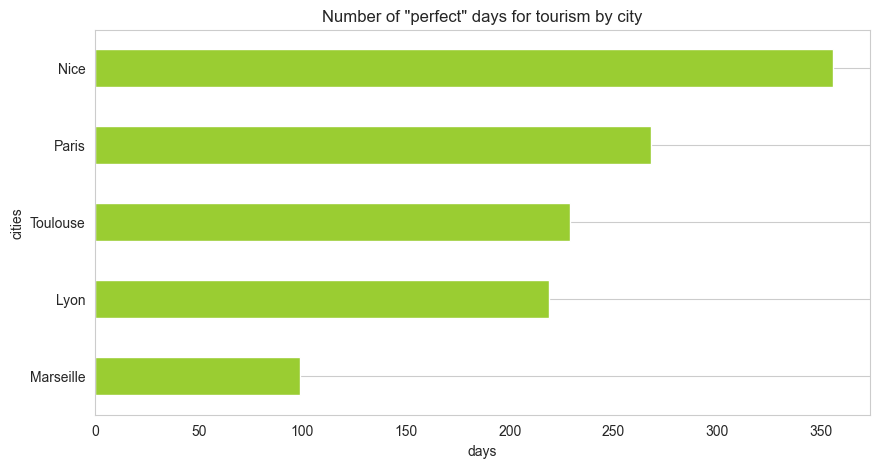

In [55]:
# Number of recommended days for tourism per city
plt.figure(figsize=(10, 5))
df[df['periode_recommandee']].groupby('ville')['periode_recommandee'].count().sort_values().plot(
    kind='barh', color='yellowgreen'
)
plt.title('Number of "perfect" days for tourism by city')
plt.xlabel('days')
plt.ylabel('cities')
plt.grid(axis='x')
plt.show()

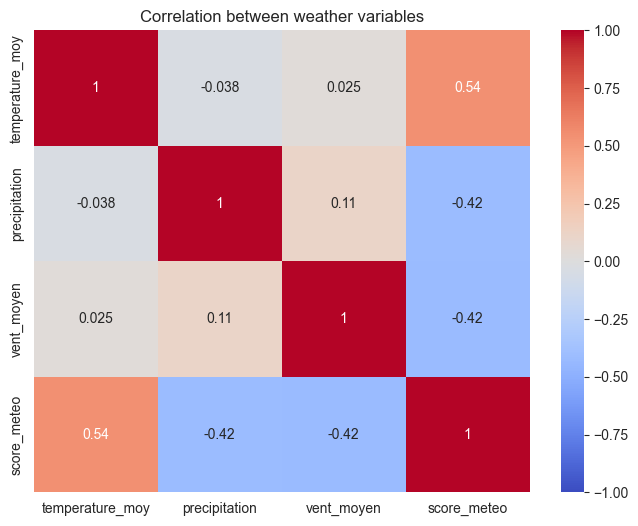

In [56]:
# Correlation between key weather variables
plt.figure(figsize=(8, 6))
corr_matrix = df[['temperature_moy', 'precipitation', 'vent_moyen', 'score_meteo']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation between weather variables')
plt.show()

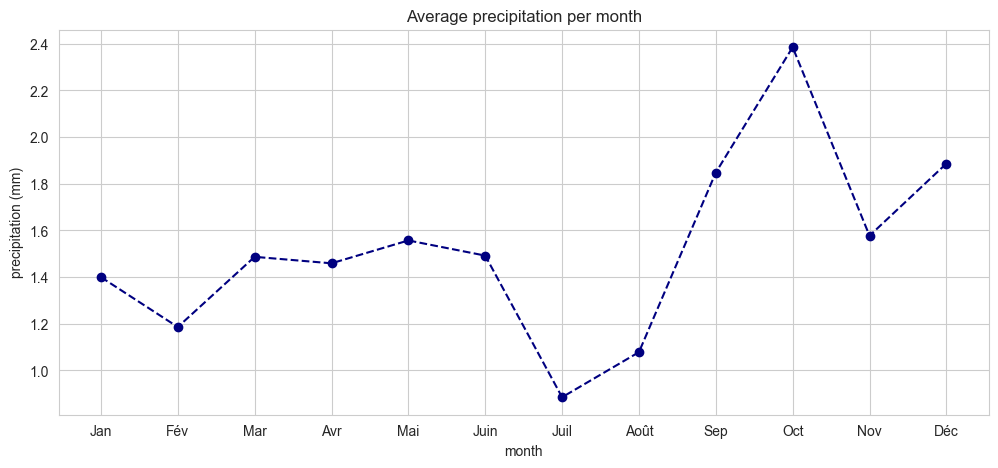

In [57]:
# Average monthly precipitation
plt.figure(figsize=(12, 5))
df.groupby('mois')['precipitation'].mean().plot(
    marker='o', color='navy', linestyle='--'
)
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.title('Average precipitation per month')
plt.ylabel('precipitation (mm)')
plt.xlabel('month')
plt.grid(True)
plt.show()

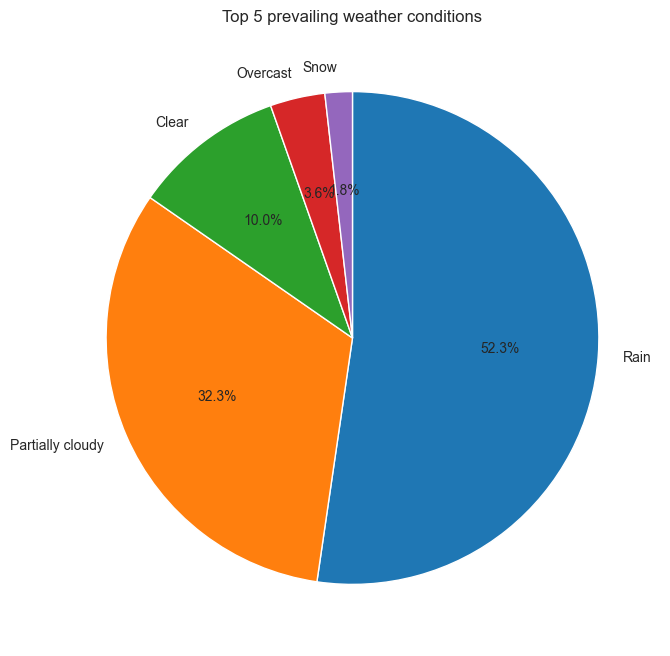

In [58]:
# Pie chart of the top 5 most frequent weather conditions
plt.figure(figsize=(8, 8))
df['conditions'].value_counts().head(5).plot(
    kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False
)
plt.title('Top 5 prevailing weather conditions')
plt.ylabel('')
plt.show()

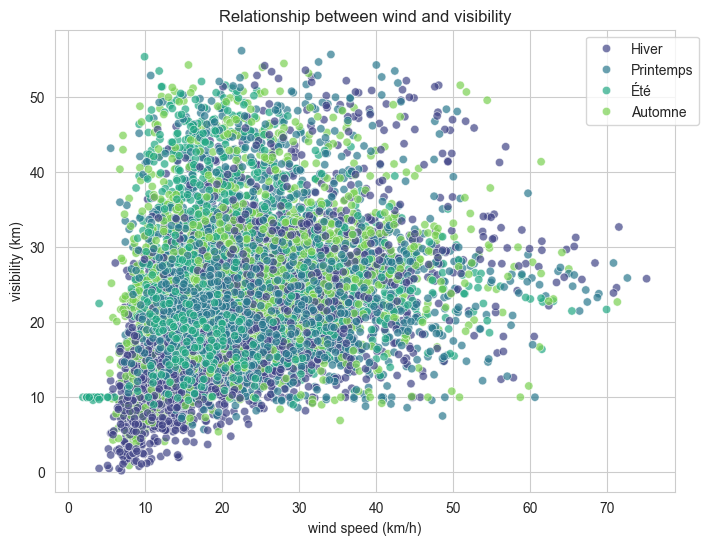

In [59]:
# Relationship between wind speed and visibility by season
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='vent_moyen', y='visibilite_moy', hue='saison', palette='viridis', alpha=0.7)
plt.title('Relationship between wind and visibility')
plt.xlabel('wind speed (km/h)')
plt.ylabel('visibility (km)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

Text(0.5, 36.72222222222221, 'month')

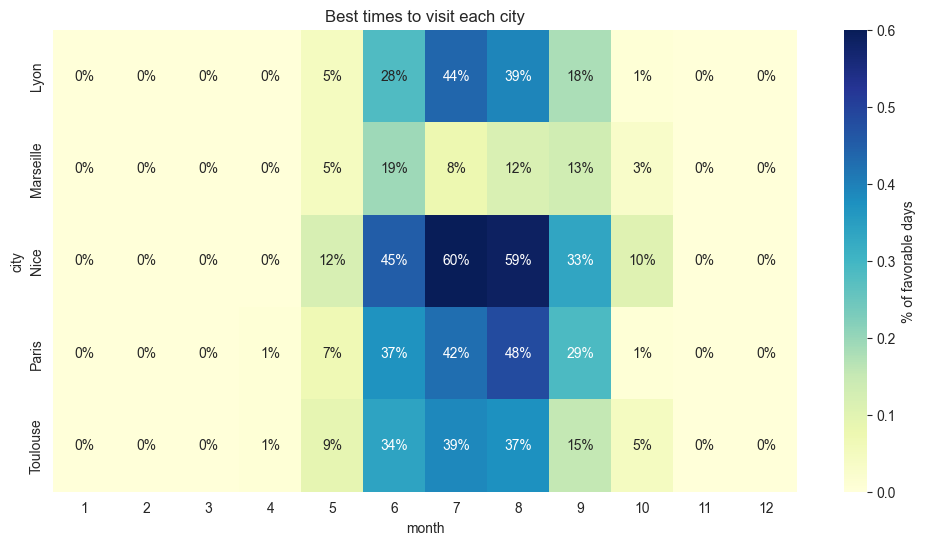

In [60]:
# Percentage of favorable days for tourism by city and month
pivot_table = df.pivot_table(index='ville', columns='mois', values='periode_recommandee', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0%', cbar_kws={'label': '% of favorable days'})
plt.title('Best times to visit each city')
plt.ylabel('city')
plt.xlabel('month')

Text(0.5, 1.0, 'Average conditions per month')

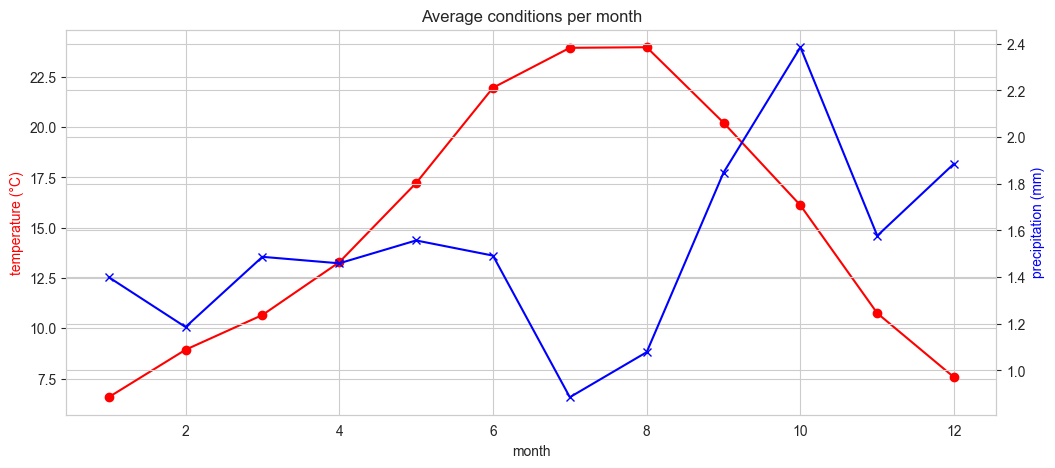

In [61]:
# Dual-axis plot showing average temperature and precipitation per month
fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()
df.groupby('mois')['temperature_moy'].mean().plot(ax=ax1, color='red', marker='o', label='Temperature')
df.groupby('mois')['precipitation'].mean().plot(ax=ax2, color='blue', marker='x', label='Precipitations')
ax1.set_ylabel('temperature (°C)', color='red')
ax2.set_ylabel('precipitation (mm)', color='blue')
ax1.set_xlabel('month')
plt.title('Average conditions per month')